In [1]:
# Auto MPG 데이터셋을 사용하여 1970년대 후반과 1980년대 초반의 자동차 연비를 예측하는 모델

import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

plt.style.use('seaborn-v0_8-white')


2.17.1


In [2]:
# 데이터 다운로드

dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
print(f"dataset_path : {dataset_path}\n")

# 판다스를 사용해 데이터 읽기

raw_dataset = pd.read_csv(
    dataset_path,                       # 파일의 경로를 지정한다.
    na_values = "?",                    # "?" 값을 결측값으로 처리해서 NaN (Not a Number)으로 간주한다.
    comment='\t',                       # 각 줄에서 '\t'를 주석으로 처리하도록 지정한다. 탭 문자로 시작하는 행은 데이터로 처리하지 않는다.
    sep=" ",                            # CSV 파일에서 공백 " "을 구분자로 지정한다.
    skipinitialspace=True               # True로 설정하면, 필드 구분자와 값 사이에 있는 불필요한 공백을 자동으로 무시한다.
)

dataset = raw_dataset.copy()

# 데이터 읽기 - 열 이름 설정하기

    # - MPG: 갤런당 마일 (연비)
    # - Cylinders: 실린더 수
    # - Displacement: 배기량
    # - Horsepower: 마력
    # - Weight: 무게
    # - Acceleration: 가속도
    # - Model Year: 모델 연도
    # - Origin: 원산지

column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(
    dataset_path,                       # 파일의 경로를 지정한다.
    names=column_names,                 # 열에 이름을 지정한다.
    na_values = "?",                    # "?" 값을 결측값으로 처리해서 NaN (Not a Number)으로 간주한다.
    comment='\t',                       # 각 줄에서 '\t'를 주석으로 처리하도록 지정한다. 탭 문자로 시작하는 행은 데이터로 처리하지 않는다.
    sep=" ",                            # CSV 파일에서 공백 " "을 구분자로 지정한다.
    skipinitialspace=True               # True로 설정하면, 필드 구분자와 값 사이에 있는 불필요한 공백을 자동으로 무시한다.
)

dataset = raw_dataset.copy()
dataset


  16384/Unknown 0s 4us/stepdataset_path : /root/.keras/datasets/auto-mpg.data



,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [3]:
# 데이터 정제하기

print("\n================ 데이터 정제 ================\n")

print("\n[누락 데이터 삭제 전]")
print(dataset.isna().sum())
dataset = dataset.dropna()
print("\n[누락 데이터 삭제 후]")
print(dataset.isna().sum())

# origin 을 기준으로 국가 추가하기

print("\n================ 데이터프레임에 국가 추가 ================\n")

origin = dataset.pop('Origin') # pop() : 해당 값을 제거하고 반환한다.

# "Origin" 열은 수치형이 아니고 범주형이므로 원-핫 인코딩(one-hot encoding)으로 변환한다. # (origin == 번호) 조건식이 true면 1이 반환되고 false면 0이 반환된다.

dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0

dataset



================ 데이터 정제 ================


[누락 데이터 삭제 전]
MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

[누락 데이터 삭제 후]
MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

================ 데이터프레임에 국가 추가 ================



<ipython-input-3-cb3094b595de>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['USA'] = (origin == 1)*1.0
<ipython-input-3-cb3094b595de>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Europe'] = (origin == 2)*1.0
<ipython-input-3-cb3094b595de>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1.0,0.0,0.0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1.0,0.0,0.0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1.0,0.0,0.0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1.0,0.0,0.0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0


In [4]:
# 데이터 세트 분할

# 전체에서 80%는 훈련용으로 20%는 시험용으로 분할한다.

train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

print("\n=========== 데이터셋의 길이 ===========\n")
print(f"전체 데이터셋의 길이 : {len(dataset)}")
print(f"분할된 훈련용 데이터셋의 길이 : {len(train_dataset)}")
print(f"분할된 시험용 데이터셋의 길이 : {len(test_dataset)}")

print("\n=========== 데이터셋의 형태 ===========\n")
print(f"전체 데이터셋의 형태 : {dataset.shape}")
print(f"분할된 훈련용 데이터셋의 형태 : {train_dataset.shape}")
print(f"분할된 시험용 데이터셋의 형태 : {test_dataset.shape}")



=========== 데이터셋의 길이 ===========

전체 데이터셋의 길이 : 392
분할된 훈련용 데이터셋의 길이 : 314
분할된 시험용 데이터셋의 길이 : 78

=========== 데이터셋의 형태 ===========

전체 데이터셋의 형태 : (392, 10)
분할된 훈련용 데이터셋의 형태 : (314, 10)
분할된 시험용 데이터셋의 형태 : (78, 10)


In [ ]:
# 데이터 시각화

# 각각의 컬럼끼리의 상관관계와 분포를 표현

    # - MPG: 갤런당 마일 (연비)
    # - Cylinders: 실린더 수
    # - Displacement: 배기량
    # - Weight: 무게

sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde") # diag_kind="kde" : 대각선에 커널 밀도 추정 그래프를 그린다. 데이터의 구간을 나누지 않고 부드러운 분포 형태로 보여준다.


<hr>
<hr>
<hr>
<hr>


In [5]:
# 통계

train_stats = train_dataset.describe()      # 훈련 데이터셋의 통계표 제작
train_stats.pop("MPG")                      # 훈련 데이터셋의 통계표에서 MPG 열 삭제
train_stats = train_stats.transpose()       # 훈련 데이터셋의 통계표의 행과 열의 위치를 서로 변경

# 특성과 레이블 분리하기 - MPG를 예측하는 모델을 만들기 위해 MPG열을 제거하기

train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

# 데이터 정규화 - 각 특성의 값끼리 차이가 크게 나는 현상을 방지한다.

def norm(x):
  return (x - train_stats['mean']) / train_stats['std'] # mean 평균 std 표준편차

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)


In [8]:
# 모델 만들기

def build_model():
  model = keras.Sequential([ # 순차적인 모델을 정의하는 방식이다. 한 층이 다른 층에 입력으로 들어가는 형태로 모델을 구현한다.
      layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),   # layer : 뉴런은 64개이다. 활성화 함수로 relu를 사용해 음수는 0으로 양수는 그대로 출력하는 비선형 함수로 구성한다. 입력 데이터의 크기는 훈련 데이터셋에 있는 특성의 개수로 지정해, N개라면 (N,)의 크기로 지정한다.
      layers.Dense(64, activation='relu'),                                            # layer : 뉴런은 64개이다. 활성화 함수로 relu를 사용해 음수는 0으로 양수는 그대로 출력하는 비선형 함수로 구성한다. 입력층의 크기는 위의 출력층의 크기와 같다.
      layers.Dense(1)                                                                 # layer : 뉴런은 1개로 모델의 마지막 출력층이다. 활성화함수가 지정되지 않았기 때문에 default인 선형 활성화 함수가 사용되며, 이는 예측값이 실수값으로 연속적으로 나오게 한다.
  ])
  optimizer = tf.keras.optimizers.RMSprop(0.001)  # RMSprop은 Root Mean Square Propagation 약자로, 기울기 하강법의 변형 중 하나인데, 각 파라미터에 대해 동적으로 다른 학습률을 적용해 빠르게 수렴할 수 있도록 한다. 초기 학습률은 0.001 이다.
  model.compile(
      loss='mse',                 # 평균제곱오차를 사용한다. 예측값과 실제값의 차이를 제곱해 평균을 낸 값으로, 작을수록 예측이 더 정확하다. 회귀 문제에서 자주 사용하는 손실함수이다.
      optimizer = optimizer,      # 모델을 학습할 때 사용할 최적화 알고리즘으로, 앞서 설정한 RMSprop 옵티마이저를 사용한다.
      metrics=['mae', 'mse']      # 모델 성능을 평가하기 위한 지표이다. MAE는 예측값과 실제값의 절대 차이를 평균해 모델의 정확성을 평가하고 MSE는 예측값과 실제값의 차이를 제곱해 평균해 모델이 얼마나 오차를 줄였는지 평가한다.
  )
  return model

# 모델 빌드

model = build_model()

# 모델 확인

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,865 (19.00 KB)

 Trainable params: 4,865 (19.00 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# 모델 실행

random_index = np.random.randint(0, len(normed_train_data))
print(f"랜덤 인덱스 : {random_index}")

example_batch = normed_train_data[random_index:random_index+1]
example_result = model.predict(example_batch)
print(example_result)
normed_train_data[random_index:random_index+1]


랜덤 인덱스 : 159
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
[[0.15118779]]


,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
249,1.483887,0.619961,0.134674,0.444068,-0.021237,0.571849,0.774676,-0.465148,-0.495225


In [10]:
# 모델 훈련

# 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정 표시
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
    normed_train_data,
    train_labels,
    epochs = EPOCHS,
    validation_split = 0.2,
    verbose = 0,
    callbacks = [PrintDot()]
)

print("\n훈련 완료\n")

# 모델의 훈련 과정

hist = pd.DataFrame(history.history)

# 인덱스와 에포크가 같아서 생략 가능
#hist['epoch'] = history.epoch

hist



....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

,loss,mae,mse,val_loss,val_mae,val_mse
0,553.859802,22.330412,553.859802,542.374390,22.109631,542.374390
1,505.714630,21.311256,505.714630,491.594818,21.004526,491.594818
2,457.815063,20.224043,457.815063,437.019653,19.748049,437.019653
3,405.451843,18.976053,405.451843,377.748260,18.291985,377.748260
4,348.940063,17.540407,348.940063,314.571991,16.600552,314.571991
...,...,...,...,...,...,...
995,2.591727,1.068024,2.591727,9.059465,2.250851,9.059465
996,2.319810,0.955683,2.319810,9.591390,2.287910,9.591390
997,2.271829,0.961757,2.271829,9.150030,2.266154,9.150030
998,2.241749,0.942668,2.241749,9.662491,2.352286,9.662491


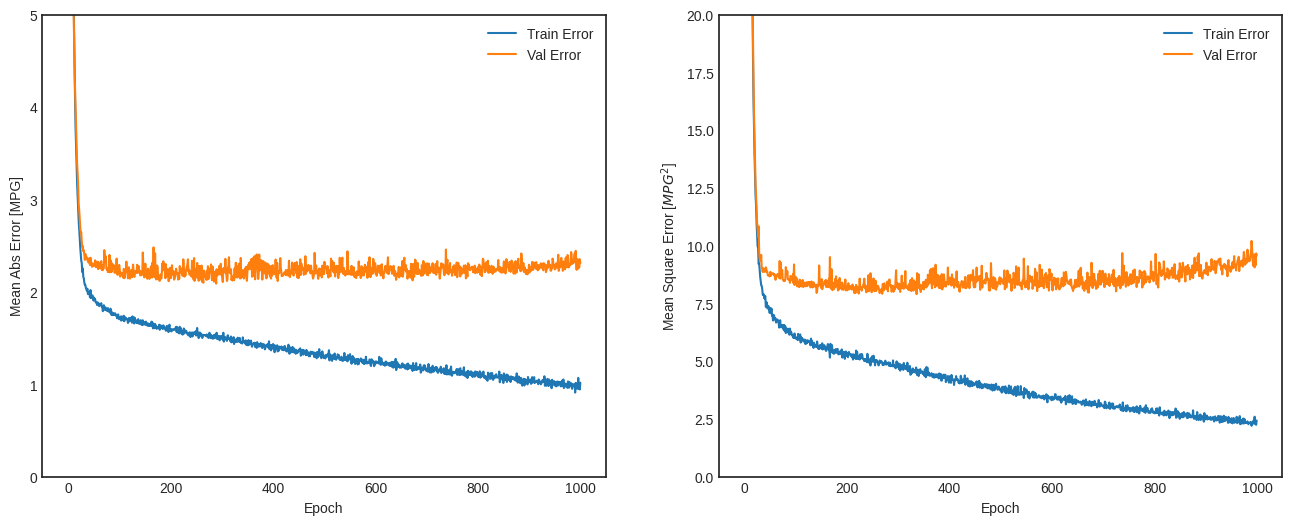

In [11]:
# 훈련 과정 시각화

import matplotlib.pyplot as plt

def plot_history(history):

    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,6))

    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()

    plt.show()

plot_history(history)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



....................................................

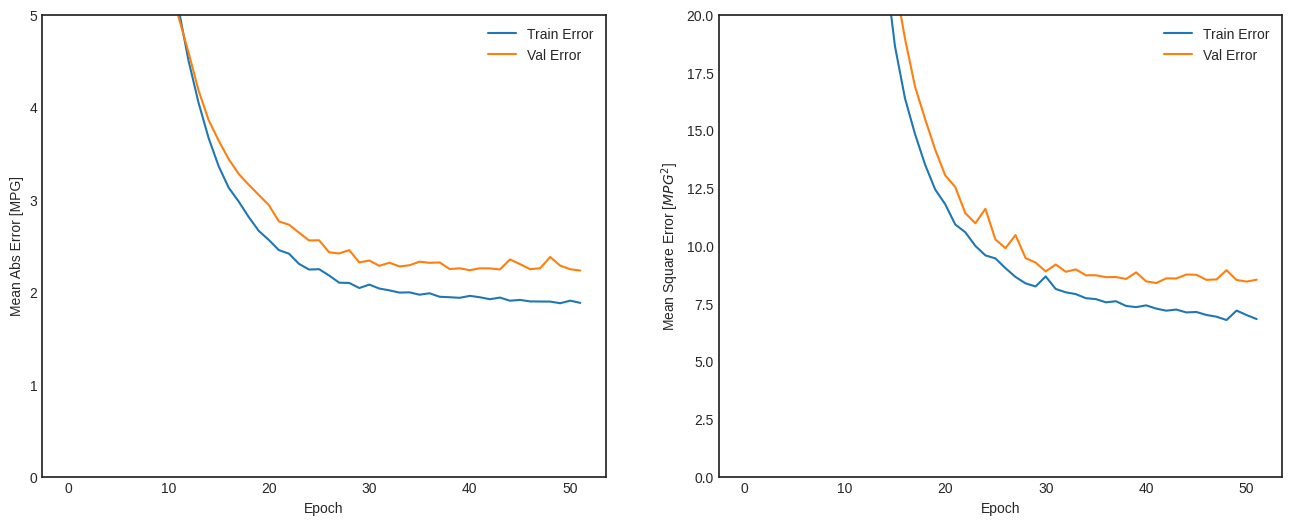



10/10 - 0s - 3ms/step - loss: 6.9435 - mae: 1.9158 - mse: 6.9435
훈련 세트의 평균 절대 오차 :  1.92 MPG
3/3 - 0s - 8ms/step - loss: 5.6900 - mae: 1.8485 - mse: 5.6900
시험 세트의 평균 절대 오차 :  1.85 MPG


In [12]:
# 모델 훈련 코드 수정

# 지정된 에포크 횟수 동안 검증 점수가 향상되지 않으면 자동으로 훈련을 멈추도록 만들어 보죠.

model = build_model()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)  # EarlyStopping : 훈련 중에 모델의 성능이 개선되지 않으면 훈련을 중단하는 콜백 # 파라미터에서, monitor='val_loss'는 검증 손실을 모니터링해 성능 개선이 멈추면 훈련을 중지하고, patience=10는 성능이 개선되지 않더라도 val_loss가 10번의 에포크 동안 개선되지 않으면 훈련을 중지한다.

history = model.fit(
    normed_train_data,
    train_labels,
    epochs = EPOCHS,
    validation_split = 0.2,
    verbose = 0,
    callbacks = [early_stop, PrintDot()]
)

plot_history(history)
print("\n")

# 모델의 성능 확인

train_loss, train_mae, train_mse = model.evaluate(normed_train_data, train_labels, verbose=2)
print("훈련 세트의 평균 절대 오차 : {:5.2f} MPG".format(train_mae))
test_loss, test_mae, test_mse = model.evaluate(normed_test_data, test_labels, verbose=2)
print("시험 세트의 평균 절대 오차 : {:5.2f} MPG".format(test_mae))


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


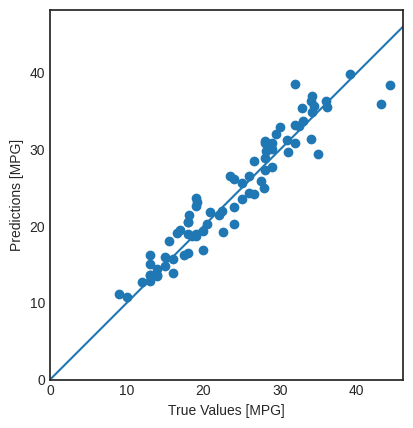

In [13]:
# 예측

# 테스트 세트에 있는 샘플을 사용해 MPG 값을 예측한다.

test_predictions = model.predict(normed_test_data).flatten() # 정규화된 테스트 데이터에 대해 예측을 수행해 반환한다. 반환 값이 2D 배열이기 때문에 .flatten() 메서드를 사용해 1D 배열로 반환한다.

plt.scatter(test_labels, test_predictions)  # 산점도 그리기
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')                           # X축과 Y축의 단위 비율을 같게 설정하기
plt.axis('square')                          # X축과 Y축의 길이를 같게 설정하기
plt.xlim([0,plt.xlim()[1]])                 # x축의 최소값을 0으로 설정하고 최대값은 자동으로 설정된 최대값을 그대로 사용하기 (예측이 음수일 경우 그래프에 표시하지 않기)
plt.ylim([0,plt.ylim()[1]])                 # y축의 최소값을 0으로 설정하고 최대값은 자동으로 설정된 최대값을 그대로 사용하기 (예측이 음수일 경우 그래프에 표시하지 않기)
_ = plt.plot([-100, 100], [-100, 100])      # 대각선 그리기 (실제값과 예측값이 같을 때는 해당 대각선 상에 점이 위치하기)


,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan,MPG_Label,MPG_Prediction,MPG_Error
9,1.483887,1.865988,2.234620,1.018782,-2.530891,-1.604642,0.774676,-0.465148,-0.495225,15.0,15.948062,0.948062
25,1.483887,1.578444,2.890853,1.925289,-0.559020,-1.604642,0.774676,-0.465148,-0.495225,10.0,10.819128,0.819128
28,1.483887,1.041693,2.313368,2.063931,1.054328,-1.604642,0.774676,-0.465148,-0.495225,9.0,11.200924,2.200924
31,-0.869348,-0.789008,-0.259066,-0.903250,-0.559020,-1.332580,-1.286751,-0.465148,2.012852,25.0,23.592871,-1.407129
33,0.307270,0.351586,-0.127819,-0.422150,-0.917542,-1.332580,0.774676,-0.465148,-0.495225,19.0,22.605946,3.605946
...,...,...,...,...,...,...,...,...,...,...,...,...
369,-0.869348,-0.798593,-0.442811,-0.705359,0.875068,1.660094,0.774676,-0.465148,-0.495225,34.0,31.420513,-2.579487
375,-0.869348,-0.865687,-0.810302,-1.197124,-0.092942,1.660094,-1.286751,2.143005,-0.495225,36.0,36.291283,0.291283
382,-0.869348,-0.836932,-0.915299,-0.883106,0.480693,1.660094,-1.286751,-0.465148,2.012852,34.0,36.299252,2.299252
384,-0.869348,-0.999874,-0.994047,-1.214899,0.050467,1.660094,-1.286751,-0.465148,2.012852,32.0,38.589314,6.589314


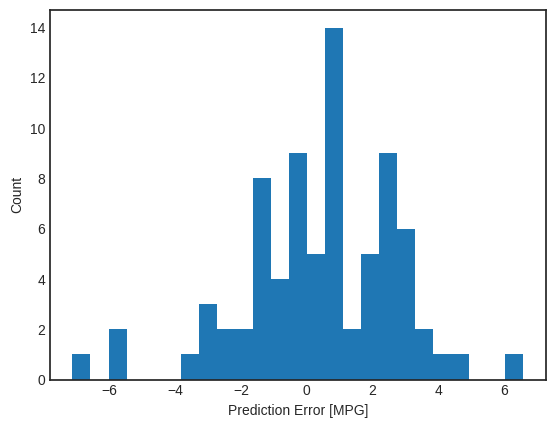

In [14]:
# 오차의 분포 살펴보기

error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

# 데이터프레임에 실제값, 예측값, 오차를 삽입하기

normed_test_data_frame = normed_test_data.copy()
normed_test_data_frame["MPG_Label"] = test_labels
normed_test_data_frame["MPG_Prediction"] = test_predictions
normed_test_data_frame["MPG_Error"] = error
normed_test_data_frame


# 예측값인 MPG 열에 데이터 정규화를 적용했을 경우

In [ ]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

plt.style.use('seaborn-v0_8-white')

# 데이터 다운로드

dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
print(f"\ndataset_path : {dataset_path}\n")

# 판다스를 사용해 데이터 읽기

raw_dataset = pd.read_csv(
    dataset_path,                       # 파일의 경로를 지정한다.
    na_values = "?",                    # "?" 값을 결측값으로 처리해서 NaN (Not a Number)으로 간주한다.
    comment='\t',                       # 각 줄에서 '\t'를 주석으로 처리하도록 지정한다. 탭 문자로 시작하는 행은 데이터로 처리하지 않는다.
    sep=" ",                            # CSV 파일에서 공백 " "을 구분자로 지정한다.
    skipinitialspace=True               # True로 설정하면, 필드 구분자와 값 사이에 있는 불필요한 공백을 자동으로 무시한다.
)

dataset = raw_dataset.copy()

# 데이터 읽기 - 열 이름 설정하기

column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(
    dataset_path,                       # 파일의 경로를 지정한다.
    names=column_names,                 # 열에 이름을 지정한다.
    na_values = "?",                    # "?" 값을 결측값으로 처리해서 NaN (Not a Number)으로 간주한다.
    comment='\t',                       # 각 줄에서 '\t'를 주석으로 처리하도록 지정한다. 탭 문자로 시작하는 행은 데이터로 처리하지 않는다.
    sep=" ",                            # CSV 파일에서 공백 " "을 구분자로 지정한다.
    skipinitialspace=True               # True로 설정하면, 필드 구분자와 값 사이에 있는 불필요한 공백을 자동으로 무시한다.
)

dataset = raw_dataset.copy()

# 데이터 정제하기

dataset = dataset.dropna() # 누락된 행 삭제 # 결과를 출력하려면 "dataset.isna().sum()" 실행

# origin 을 기준으로 국가 추가하기

origin = dataset.pop('Origin') # pop() : 해당 값을 제거하고 반환한다.

dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0

# 데이터 세트 분할

# 전체에서 80%는 훈련용으로 20%는 시험용으로 분할한다.

train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

# 통계
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()

# 특성과 레이블 분리하기 - MPG를 예측하는 모델을 만들기 위해 MPG열을 제거하기

# 데이터 정규화 - 각 특성의 값끼리 차이가 크게 나는 현상을 방지한다.

def norm(x):
  return (x - train_stats['mean']) / train_stats['std'] # mean 평균 std 표준편차

# 데이터 정규화
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

print("\n정규화된 데이터 프레임\n")
normed_train_data # 각각의 샘플별 특성 값들은 평균대비 +- 값을 나타낸다. 값이 N일 경우 평균보다 N만큼 크고 값이 -N일 경우 평균보다 N만큼 작다.


2.17.1

dataset_path : /root/.keras/datasets/auto-mpg.data


정규화된 데이터 프레임



,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
146,0.606767,-0.869348,-1.009459,-0.784052,-1.025303,-0.379759,-0.516397,0.774676,-0.465148,-0.495225
282,-0.130748,-0.869348,-0.530218,-0.442811,-0.118796,0.624102,0.843910,0.774676,-0.465148,-0.495225
69,-1.463452,1.483887,1.482595,1.447140,1.736877,-0.738281,-1.060519,0.774676,-0.465148,-0.495225
378,1.900654,-0.869348,-0.865687,-1.099044,-1.025303,-0.308055,1.660094,0.774676,-0.465148,-0.495225
331,1.357221,-0.869348,-0.942365,-0.994047,-1.001603,0.875068,1.115971,-1.286751,-0.465148,2.012852
...,...,...,...,...,...,...,...,...,...,...
281,-0.454220,0.307270,0.044872,-0.521559,-0.000298,0.946772,0.843910,0.774676,-0.465148,-0.495225
229,-0.945897,1.483887,1.961837,1.972127,1.457223,-1.598734,0.299787,0.774676,-0.465148,-0.495225
150,0.347990,-0.869348,-0.836932,-0.311564,-0.710099,-0.021237,-0.516397,-1.286751,-0.465148,2.012852
145,1.124322,-0.869348,-1.076553,-1.151543,-1.169870,1.233589,-0.516397,-1.286751,-0.465148,2.012852
